In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [40]:
# Loading the data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


5


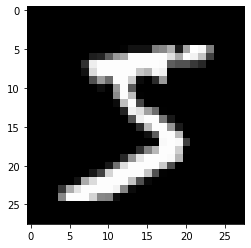

In [12]:
plt.imshow(X_train[0], 'gray');
print(y_train[0])

In [41]:
from tensorflow.keras.utils import to_categorical

# Reshape the data for CNN
# The images are gray level, so one channel is enough to represent the picture as it is
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

# Transforming the labels (with one hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
# Normalizing the pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

---
# CNN Model

CNNs are good at working with high dimensional data such as images. So, I am going to use it for this data set to classify the numbers between 0 and 9.

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [16]:
conv = Conv2D(32, kernel_size=(5,5), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1))

# Creating a sequential model
model = Sequential(name='mnist_classifier')

# Adding conv2d layer with the 5x5 kernel
model.add(conv)
# Adding max pooling layer to decrease the number parameters
model.add(MaxPool2D(pool_size=(2,2)))
# Flattening the output of CNN
model.add(Flatten())
# A regular dense layer with 70 nodes
model.add(Dense(70, activation='relu', kernel_initializer='he_uniform'))
# Ouput layer with 10 nodes (since it is going to return one hot encoded version of the real label)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "mnist_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 70)                322630    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                710       
Total params: 324,172
Trainable params: 324,172
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1244 - accuracy: 0.9624
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 3/5
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 5/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0131 - accuracy: 0.9956


In [49]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', acc)
y_pred = model.predict(X_test)
y_pred = list(y_pred)
y_pred = [list(y).index(max(y)) for y in y_pred]
y_test_original = list(y_test)
y_test_original = [list(y).index(1.0) for y in y_test_original]
print(confusion_matrix(y_true=y_test_original, y_pred=y_pred))

Accuracy: 0.9876999855041504
[[ 979    0    0    1    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   3    1 1017    0    0    0    2    5    3    1]
 [   0    0    0  993    0   13    0    1    3    0]
 [   0    0    0    0  968    0    5    0    0    9]
 [   1    0    0    2    0  888    1    0    0    0]
 [   7    1    0    0    2    4  940    0    4    0]
 [   0    1    7    1    0    1    0 1015    1    2]
 [   4    0    1    0    0    0    0    1  966    2]
 [   2    3    0    3    5   11    0    7    2  976]]


---
# SVM classifier

Given all the pixels SVC should predict the category of the image.

In [50]:
from sklearn.svm import SVC

# Loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train = X_train[:10000], y_train[:10000]

# Converting 28x28 2D array into 1D array of 784 elements(pixels)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

# Changing the data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train /= 255
X_test /= 255

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

# SVM classifier
clf = SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', clf.score(X_test, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Train data shape: (10000, 784)
Test data shape: (10000, 784)
Accuracy: 0.917
[[ 954    0    7    1    0    6    8    2    1    1]
 [   0 1121    1    2    0    2    3    1    5    0]
 [   8   11  930   13   11    4   13   11   29    2]
 [   3    2   28  914    2   20    2   10   21    8]
 [   2    1   12    0  927    0    6    6    2   26]
 [  12    6    6   60    7  754   15    1   26    5]
 [  12    3   12    1    9   12  906    0    2    1]
 [   3    8   24   15    9    0    0  943    5   21]
 [   7   18   10   31    9   32   11    6  840   10]
 [   8    8    1   15   46    6    1   37    6  881]]


---
# VPI model

This model is slow for big data sets and especially with higher dimensions. So, I am going to add an extra preprocessing stage by subsampling the images first; that way the dimension becomes less problematic than it was before. This model works better when there is a correlation between the labels and the features; more features being similar implies the labels are similar as well and less features being similar implies the otherwise. The question is how to represent the image data so that this precondition of similarity is satisfied. The first simple idea is to represent the whole 2D image as a 1D array of values(pixels); if the images are so similar pixel-wisely then their labels should be the same as well, if not then they should probably represent different numbers and therefore, their labels are probably different. However, this idea can fail due to the several reasons:

- What if there are two images with the same label but the pixel-wise comparison gives us high difference between the images(person A's notation of the number 7 may look different than person B's notation of the same number)?
- What if there are two images with the same label that contain the numbers a bit shifted from the center and therefore, they are a bit away from each other when you overlap both images?
- What if there are two images with the same label one of which contains a number but a bit rotated?
- What if there are two images with the same label one of which contains a number which is the scaled version of the number represented on the other image?

*Note:* In this data set, I think the first and second factors are the ones which may ruin the whole thing since the numbers are not rotated and scaled tremendously.

In [151]:
from scipy.ndimage import zoom

# Doing the same process with an additional subsampling
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

X_train3 = list()
X_test3 = list()

# Subsampling the train images
for i in range(X_train2.shape[0]):
    X_train3.append(zoom(X_train2[i], 0.6, order=0))

# Subsampling the test images
for i in range(X_test2.shape[0]):
    X_test3.append(zoom(X_test2[i], 0.6, order=0))

X_train3 = np.array(X_train3).astype('float32')
X_test3 = np.array(X_test3).astype('float32')

X_train3 /= 255
X_test3 /= 255

y_train2, y_test2 = y_train, y_test

In [152]:
print(X_train3.shape, X_test3.shape)

(60000, 17, 17) (10000, 17, 17)


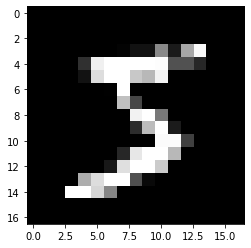

In [153]:
plt.imshow(X_train3[0], 'gray');

In [154]:
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1]*X_train3.shape[2]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1]*X_test3.shape[2]))

print(X_train3.shape, X_test3.shape)

(60000, 289) (10000, 289)


n = 1	accuracy: 0.15
n = 2	accuracy: 0.33
n = 3	accuracy: 0.33
n = 4	accuracy: 0.14
n = 5	accuracy: 0.14
n = 6	accuracy: 0.14
n = 7	accuracy: 0.21
n = 8	accuracy: 0.14
n = 9	accuracy: 0.14
n = 10	accuracy: 0.14
n = 11	accuracy: 0.14
n = 12	accuracy: 0.14
n = 13	accuracy: 0.14
n = 14	accuracy: 0.14
n = 15	accuracy: 0.14
n = 16	accuracy: 0.14
n = 17	accuracy: 0.14
n = 18	accuracy: 0.14
n = 19	accuracy: 0.14
n = 20	accuracy: 0.17
n = 21	accuracy: 0.14
n = 22	accuracy: 0.14
n = 23	accuracy: 0.17
n = 24	accuracy: 0.17
n = 25	accuracy: 0.31
n = 26	accuracy: 0.31
n = 27	accuracy: 0.31
n = 28	accuracy: 0.34
n = 29	accuracy: 0.2
n = 30	accuracy: 0.28
n = 31	accuracy: 0.3
n = 32	accuracy: 0.3
n = 33	accuracy: 0.36
n = 34	accuracy: 0.35
n = 35	accuracy: 0.42
n = 36	accuracy: 0.29
n = 37	accuracy: 0.19
n = 38	accuracy: 0.23
n = 39	accuracy: 0.18
n = 40	accuracy: 0.14
n = 41	accuracy: 0.18
n = 42	accuracy: 0.18
n = 43	accuracy: 0.18
n = 44	accuracy: 0.21
n = 45	accuracy: 0.24
n = 46	accuracy: 0.24


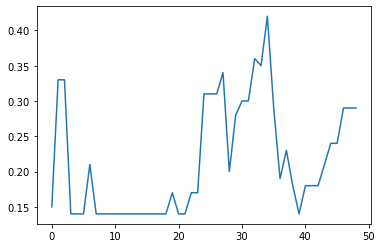

In [156]:
import vpi
import importlib
importlib.reload(vpi)
from vpi import *

# With the traing set of 2000 images
X_train4 = X_train3[:2000]
# With the test set of 100 images
X_test4 = X_test3[:100]

accs = list()
for i in range(1,50):
    print(f'n = {i}', end='')
    y_pred = vpi(X_test4, X_train4, y_train4, n=int(2*i))
    acc = 0
    for j in range(len(y_pred)):
        if list(y_pred[j]).index(max(y_pred[j])) == list(y_test4[j]).index(1.0):
            acc += 1
    accs.append(acc / len(y_pred))
    print('\taccuracy:', accs[-1])
print('Accuracy:', max(accs))
plt.plot(accs);

In [17]:
print(f'Best accuracy: {max(accs)}, (with n = {2 * (accs.index(max(accs)) + 1)})')

Best accuracy: 0.42, (with n = 70)


The result(42%) shows that there is a "progression" (since it is better than 10%) which means the model's approach to predict the data of 2D->1D transformations of different images exposes some amount of correlation.

*Note:* I know that the VPI model does not work well in this particular data set, but I am working on it... I also think finding some kind of new metrics(other than the degree of image overlapping) could help the model to be more accurate and fast. These metrics have to generalize the image in some way with less computation time and that way only measuring the metrics of a given image would be enough to predict its label(and it would also be probably faster since there could be way less metrics than 28*28 to represent and distinguish the images hopefully).